In [136]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

In [63]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)




In [64]:
df=pd.read_csv(r"C:\Users\Imthiyas\Downloads\train (1).csv")

In [65]:
pd.set_option('display.max_columns', None)
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


### Data Insights
#### Features
**Age:** Continuous feature representing the customer's age.

**Job:** Multi-class categorical feature indicating the customer's job type.

**Marital:** Multi-class categorical feature denoting the customer's marital status (single, married, divorced).

**Education Qualification(education_qual):** Multi-class categorical feature specifying the customer's educational qualification.

**Call Type:** Multi-class categorical feature describing the type of call in which company employees contacted the customer.

**Day:** Continuous feature indicating the day of the month when employees contacted the customer.

**Month(mon):** Multi-class categorical feature denoting the month when employees contacted the customer.

**Duration (dur):** Continuous feature representing the duration of the call in seconds. A longer duration may indicate a higher likelihood of the customer taking insurance.

**Number of Calls (num_calls):** Continuous feature representing the number of calls made to the customer by employees.

**Previous Outcome (prev_outcome):** Multi-class categorical feature indicating the status of the previous call made to the customer.

#### Target
**Y:** Binary categorical target variable indicating whether the customer opted for insurance or not. The target variable is imbalanced, and balancing is needed.

## Standard Cleaning

In [66]:
df.shape

(45211, 11)

In [67]:
df.keys()

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [68]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [69]:
df.dtypes
# All features and the target have the appropriate data types.

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [70]:
df = df.drop_duplicates()

In [71]:
df.shape

(45205, 11)

The number of rows has been reduced from 45,211 to 45,205.

## Column Wise Cleaning

#### AGE Column

In [72]:
df['age'].value_counts()

age
32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [73]:
df['age'].describe()
# Upon comparing the value_counts and the summary, it appears that individuals with advanced age could be considered as outliers. It is recommended to clip these outliers.

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [74]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1

lower_threshold = round(q1-(1.5*iqr))
upper_threshold = round(q3+(1.5*iqr))

lower_threshold, upper_threshold

(10, 70)

In [75]:
# Applying outlier clipping to the 'age' column.
df.loc[:, 'age'] = df['age'].clip(lower_threshold, upper_threshold)

In [76]:
df['age'].describe()

count    45205.000000
mean        40.863666
std         10.380009
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

#### JOB Column

In [77]:
df['job'].value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [78]:
df.loc[df['job'] == 'unknown', 'job'] = np.nan
df['job'].isnull().sum()

288

In [79]:
# Imputing the missing values using the mode.
df = df.fillna({'job' : st.mode(df['job'])})
df['job'].value_counts()

job
blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64

#### MARITAL Column

In [80]:
df['marital'].value_counts()
# No imputations or corrections are required for this column.

marital
married     27210
single      12788
divorced     5207
Name: count, dtype: int64

#### EDUCATIONAL QUALIFICATION Column

In [81]:
df['education_qual'].value_counts()

education_qual
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: count, dtype: int64

In [82]:
# Imputing 'unknown' using the mode.
df.loc[df['education_qual'] == 'unknown', 'education_qual'] = st.mode(df['education_qual'])
df['education_qual'].value_counts()

education_qual
secondary    25056
tertiary     13299
primary       6850
Name: count, dtype: int64

#### CALL TYPE Column

In [83]:
df['call_type'].value_counts()
# There are more unknown values in this column to be dropped.
#Instead of dropping them,we choose to retain them as a distinct category.

call_type
cellular     29282
unknown      13017
telephone     2906
Name: count, dtype: int64

#### DAY Column

In [84]:
df['day'].value_counts()
# This column contains no unstructured data, and therefore, no imputations or corrections are required.

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

#### MONTH Column

In [85]:
df['mon'].value_counts()
# This column contains no unstructured data, and as a result, no imputations or corrections are necessary.

mon
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

#### DURATION Column

In [86]:
df['dur'].describe()
# The maximum value is significantly higher than the third quartile (Q3), indicating a potential presence of outliers.
#Thus, it is advisable to perform outlier clipping on this column.

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [87]:
q1 = df['dur'].quantile(0.25)
q3 = df['dur'].quantile(0.75)
iqr = q3-q1

lower_threshold = round(q1-(1.5*iqr))
upper_threshold  = round(q3+(1.5*iqr))

lower_threshold, upper_threshold

(-221, 643)

In [88]:
df.loc[:, 'dur'] = df['dur'].clip(lower_threshold, upper_threshold)
df['dur'].describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

#### NUMBER OF CALLS Column

In [89]:
df['num_calls'].value_counts()
# The number of customers with more than 10 calls is notably low.
#Clipping is recommended for this column to address the impact of these infrequent occurrences.

num_calls
1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64

In [90]:
df['num_calls'].describe()

count    45205.000000
mean         2.763898
std          3.098189
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [91]:
q1 = df['num_calls'].quantile(0.25)
q3 = df['num_calls'].quantile(0.75)
iqr = q3-q1

lower_threshold = round(q1-(1.5*iqr))
upper_threshold  = round(q3+(1.5*iqr))

lower_threshold, upper_threshold

(-2, 6)

In [92]:
df.loc[:, 'num_calls'] = df['num_calls'].clip(lower_threshold, upper_threshold)
df['num_calls'].describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

#### PREVIOUS OUTCOME Column

In [93]:
df['prev_outcome'].value_counts()
#The presence of 'unknown' values in this column is considered valid and intentional;they should not be treated as null values.
#Therefore, no imputations or corrections are required for this column.

prev_outcome
unknown    36953
failure     4901
other       1840
success     1511
Name: count, dtype: int64

#### Y Column

In [94]:
df['y'].value_counts()
# There is no unstructured data in this column, and consequently, no imputations or corrections are necessary.

y
no     39916
yes     5289
Name: count, dtype: int64

### Final Validation

In [95]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [96]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [97]:
df = df.drop_duplicates()

In [98]:
df.shape

(45194, 11)

11 rows have been removed due to the presence of duplicate values.

## Visualization of the distribution of categorical features using a countplot in the dataset

#### JOB COLUMN

In [99]:
df['job'].value_counts().sort_index()

job
admin.            5170
blue-collar      10015
entrepreneur      1487
housemaid         1240
management        9455
retired           2263
self-employed     1579
services          4152
student            937
technician        7593
unemployed        1303
Name: count, dtype: int64

Text(0.5, 1.0, 'Customers According to Job')

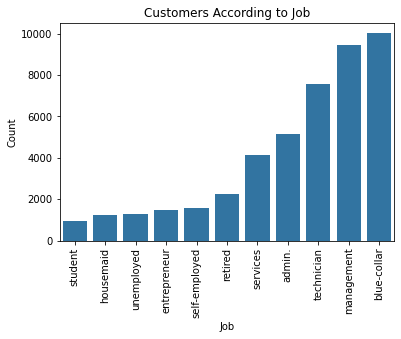

In [100]:
order = df['job'].value_counts().index.tolist()[::-1]

sns.countplot(x='job', data=df, order=order)
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Customers According to Job')

#### Insights
Based on the distribution of the 'job' feature, it is evident that the majority of calls were directed towards individuals with occupations in blue-collar, followed by management and technicians.

Conversely, the fewest calls were observed for individuals with job roles categorized as students, housemaids, and unemployed.

#### MARITAL COLUMN

Text(0.5, 1.0, 'Customers According to martial status')

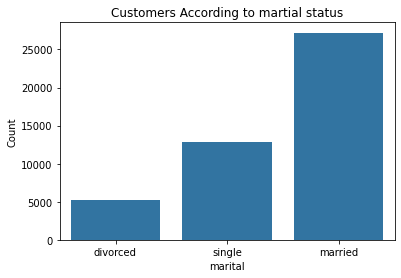

In [101]:
order = df['marital'].value_counts().index.tolist()[::-1]

sns.countplot(x='marital', data=df, order=order)
plt.xticks(rotation=0)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('Customers According to martial status')

#### Insights
Observing the distribution of the 'marital' feature, it is notable that the highest number of calls were directed towards individuals classified as married, followed by those identified as single. On the contrary, the fewest calls were made to individuals categorized as divorced.

#### EDUCATIONAL QUALIFICATION COLUMN

Text(0.5, 1.0, 'Customers According to education qualification')

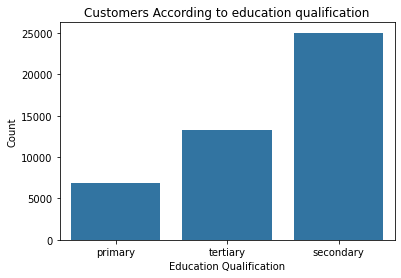

In [102]:
order = df['education_qual'].value_counts().index.tolist()[::-1]

sns.countplot(x='education_qual', data=df, order=order)
plt.xticks(rotation=0)
plt.xlabel('Education Qualification')
plt.ylabel('Count')
plt.title('Customers According to education qualification')

#### Insights

Analyzing the distribution of the 'education_qual' feature, it is apparent that the majority of calls were directed towards individuals with a secondary education, followed by those with tertiary education. Conversely, the fewest calls were made to individuals with a primary education.
 

#### CALL TYPE COLUMN

Text(0.5, 1.0, 'Customers According to call type')

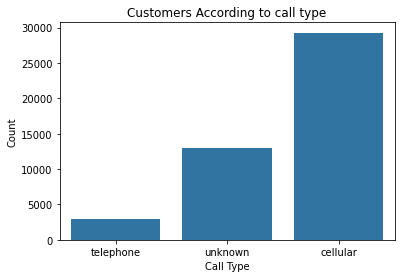

In [103]:
order = df['call_type'].value_counts().index.tolist()[::-1]

sns.countplot(x='call_type', data=df, order=order)
plt.xticks(rotation=0)
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.title('Customers According to call type')

#### Insights

Examining the distribution of the 'call_type' feature, it is evident that the highest number of calls were made to customers with a cellular contact preference, followed by those with an unknown contact type. Conversely, the fewest calls were made to customers who preferred telephone contact.
 

#### DAY COLUMN

Text(0.5, 1.0, 'Customers According to day of the month')

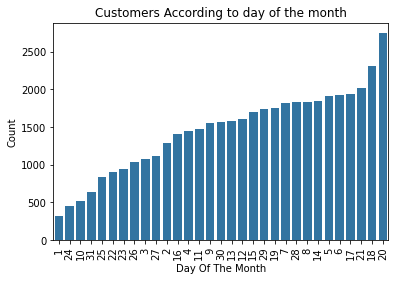

In [104]:
order = df['day'].value_counts().index.tolist()[::-1]

sns.countplot(x='day', data=df, order=order)
plt.xticks(rotation=90)
plt.xlabel('Day Of The Month')
plt.ylabel('Count')
plt.title('Customers According to day of the month')

### Insights
 Acc to the distribution of 'day' feature, most calls were made on 20th day followed by 18th day followed by 21st day.  Least calls were made on 1st, 24th, 10th days
 

#### MONTH COLUMN

Text(0.5, 1.0, 'Customers According to month')

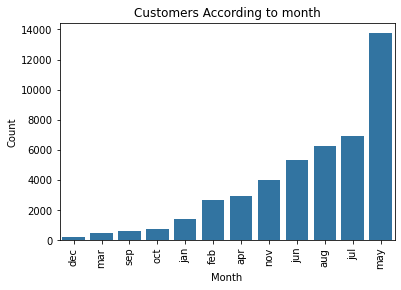

In [105]:
order = df['mon'].value_counts().index.tolist()[::-1]

sns.countplot(x='mon', data=df, order=order)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Customers According to month')

#### Insights

Based on the distribution of the 'mon' feature, it is observed that the majority of calls were made in May, followed by July and August. Conversely, the fewest calls were recorded in December, March, and September.
 

#### PREVIOUS OUTCOME COLUMN

Text(0.5, 1.0, 'Customers According to previous outcome')

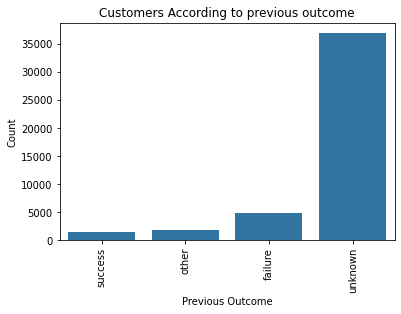

In [106]:
order = df['prev_outcome'].value_counts().index.tolist()[::-1]

sns.countplot(x='prev_outcome', data=df, order=order)
plt.xticks(rotation=90)
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.title('Customers According to previous outcome')

#### Insights

Analyzing the distribution of the 'prev_outcome' feature, it is apparent that the status of the majority of calls is categorized as unknown, followed by failure and other. Conversely, the fewest calls have a status labeled as success.


## Visualization of the distribution of continuous features using a boxplot in the dataset

#### AGE COLUMN

Text(0.5, 1.0, 'Customers according to age')

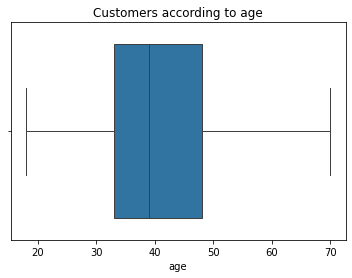

In [107]:
sns.boxplot(x = df['age'])
plt.title('Customers according to age')

#### Insights

Analyzing the distribution of the 'age' feature, it is observed that the majority of calls were made to individuals aged approximately between 32 and 48. The median age, representing the central tendency, is around 39.

Notably, as the 'age' column has been clipped to handle outliers, no outliers are observed in this plot.

#### NUMBER OF CALLS COLUMN

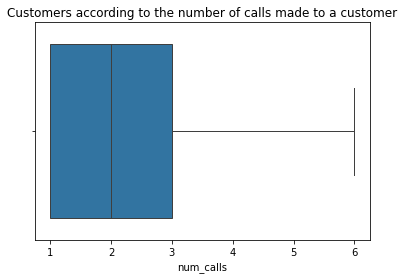

In [108]:
sns.boxplot(x=df['num_calls'])
plt.title('Customers according to the number of calls made to a customer')

if pd.api.types.is_categorical_dtype(df['num_calls']):
    plt.xticks(rotation=90)

#### Insights

Examining the distribution of the 'num_calls' feature, it is evident that the majority of calls made to customers fall within the range of 1 to 3 calls. The median, representing the central tendency, is around 2.

Notably, as the 'num_calls' column has been clipped to handle outliers, no outliers are observed in this plot.


## Visualization of the distribution of the target variable using a countplot in the dataset

Text(0.5, 1.0, 'Customers According to Targe variable')

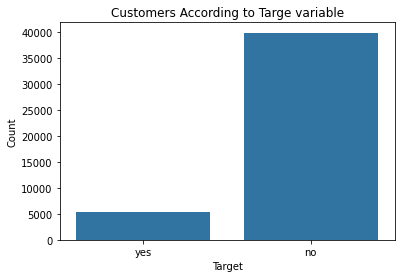

In [109]:
order = df['y'].value_counts().index.tolist()[::-1]

sns.countplot(x='y', data=df, order=order)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Customers According to Targe variable')

## Feature v/s Target Plot for Categorical Columns

In [110]:
# Encoding the target variable to 1 and 0.
df['y'] = df['y'].map({'yes' : 1, 'no' : 0})

Text(0.5, 1.0, 'Distribution of job with respect to customers who opted for insurance')

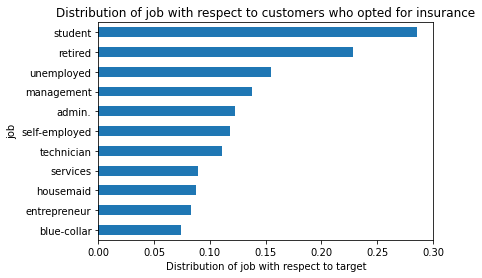

In [111]:
df.groupby('job')['y'].mean().sort_values().plot(kind = 'barh')
plt.xlabel('Distribution of job with respect to target')
plt.title('Distribution of job with respect to customers who opted for insurance')

#### Insights

Analyzing the 'job' vs. 'y' barplot, it is observed that individuals who are more likely to opt for insurance include students, followed by retirees and unemployed individuals. Conversely, the least likely to opt for insurance are those in blue-collar, entrepreneur, and housemaid occupations.

The plot indicates a linearly increasing pattern with respect to the target variable 'y' in relation to the 'job' column. Therefore, Label Encoding will be applied to this column for further analysis.

#### MARITAL COLUMN

Text(0.5, 1.0, 'Distribution of marital status with respect to customers who opted for insurance')

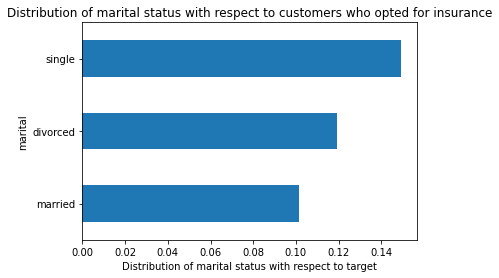

In [112]:
df.groupby('marital')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of marital status with respect to target')
plt.title('Distribution of marital status with respect to customers who opted for insurance')

#### Insights

Examining the 'marital' vs. 'y' barplot, it is observed that individuals most likely to opt for insurance are those who are single, followed by those who are divorced. Conversely, the least likely to opt for insurance are individuals who are married.

The plot indicates a linearly increasing pattern with respect to the target variable 'y' in relation to the 'marital' column. Therefore, Label Encoding will be applied to this column for further analysis.

#### EDUCATIONAL QUALIFACTION COLUMN

Text(0.5, 1.0, 'Distribution of education qualification with respect to customers who opted for insurance')

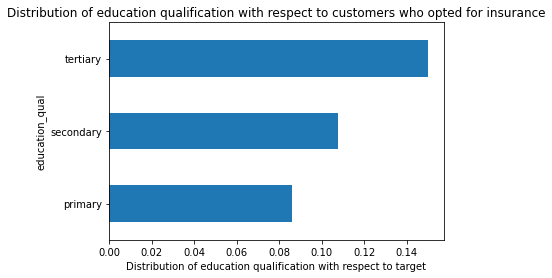

In [113]:
df.groupby('education_qual')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of education qualification with respect to target')
plt.title('Distribution of education qualification with respect to customers who opted for insurance')

#### Insights

Analyzing the 'education_qual' vs. 'y' barplot, it is observed that individuals most likely to opt for insurance are those with tertiary education, followed by those with secondary education. Conversely, the least likely to opt for insurance are individuals with primary education.

The plot indicates a linearly increasing pattern with respect to the target variable 'y' in relation to the 'education_qual' column. Therefore, Label Encoding will be applied to this column for further analysis.

#### CALL TYPE COLUMN

Text(0.5, 1.0, 'Distribution of call type with respect to customers who opted for insurance')

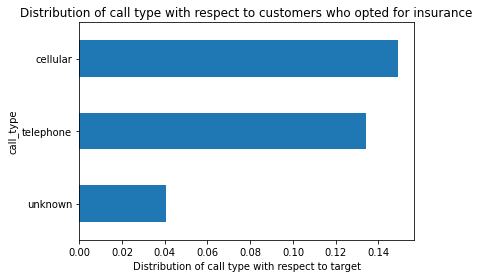

In [114]:
df.groupby('call_type')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of call type with respect to target')
plt.title('Distribution of call type with respect to customers who opted for insurance')

#### Insights

Examining the 'call_type' vs. 'y' barplot, it is observed that individuals most likely to opt for insurance are those with a cellular contact preference, followed by those who prefer telephone contact. Conversely, the least likely to opt for insurance are individuals with an unknown contact type.

The plot indicates a linearly increasing pattern with respect to the target variable 'y' in relation to the 'call_type' column. Therefore, Label Encoding will be applied to this column for further analysis.

#### DAY COLUMN

Text(0.5, 1.0, 'Distribution of day of the month with respect to customers who opted for insurance')

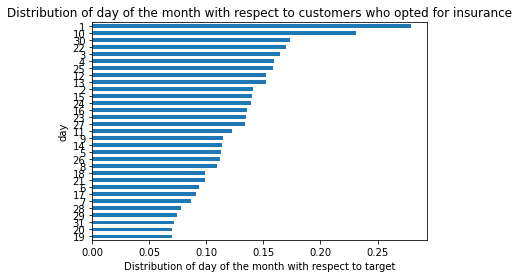

In [115]:
df.groupby('day')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of day of the month with respect to target')
plt.title('Distribution of day of the month with respect to customers who opted for insurance')

#### Insights

Analyzing the 'day' vs. 'y' barplot, it is observed that individuals most likely to opt for insurance were called on the 1st, followed by the 10th and 30th of the month. Conversely, the least likely to opt for insurance were called on the 19th, 20th, and 31st of the month.

#### MONTH COLUMN

Text(0.5, 1.0, 'Distribution of month with respect to customers who opted for insurance')

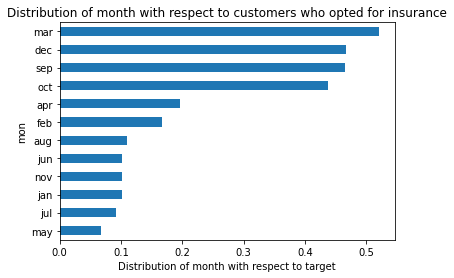

In [116]:
df.groupby('mon')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of month with respect to target')
plt.title('Distribution of month with respect to customers who opted for insurance')

#### Insights

Examining the 'mon' vs. 'y' barplot, it is observed that individuals most likely to opt for insurance were called in the months of March, followed by December and September. Conversely, the least likely to opt for insurance were called in the months of May, July, and January.

The plot indicates a linearly increasing pattern with respect to the target variable 'y' in relation to the 'mon' column. Therefore, Label Encoding will be applied to this column for further analysis.

#### PREVIOUS OUTCOME COLUMN

Text(0.5, 1.0, 'Distribution of prev_outcome with respect to customers who opted for insurance')

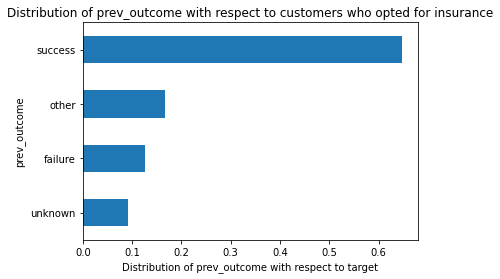

In [117]:
df.groupby('prev_outcome')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of prev_outcome with respect to target')
plt.title('Distribution of prev_outcome with respect to customers who opted for insurance')

#### Insights

Analyzing the 'prev_outcome' vs. 'y' barplot, it is observed that individuals most likely to opt for insurance have a previous outcome categorized as success, followed by other and failure. Conversely, the least likely to opt for insurance have an unknown previous outcome.

The plot indicates a linearly increasing pattern with respect to the target variable 'y' in relation to the 'prev_outcome' column. Therefore, Label Encoding will be applied to this column for further analysis.

## Feature v/s Target Plot for Continuous Columns

#### AGE COLUMN

Text(0, 0.5, 'Target Variable (y)')

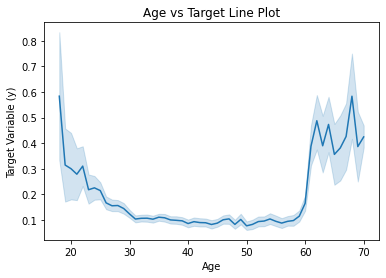

In [118]:
sns.lineplot(x=df['age'], y=df['y'])
plt.title('Age vs Target Line Plot')
plt.xlabel('Age')
plt.ylabel('Target Variable (y)')

#### Insights

Analyzing the 'age' vs. 'y' lineplot, it is observed that individuals most likely to opt for insurance are in the age groups of 18-25 and 60-70. Conversely, the least likely to opt for insurance fall within the age group of 25-59.

The 'age' column exhibits varying patterns with respect to the target variable 'y', showcasing both increasing and decreasing trends. Further analysis may be required to understand the nuanced relationship between age and the likelihood of opting for insurance.

#### DURATION COLUMN

Text(0, 0.5, 'Target Variable (y)')

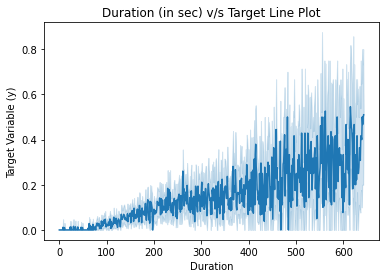

In [119]:
sns.lineplot(x=df['dur'], y=df['y'])
plt.title('Duration (in sec) v/s Target Line Plot')
plt.xlabel('Duration')
plt.ylabel('Target Variable (y)')

#### Insights

Examining the 'dur' vs. 'y' lineplot, it is observed that individuals most likely to opt for insurance had calls lasting between 450-640 seconds. Conversely, the least likely to opt for insurance had calls lasting between 0-200 seconds.

The 'dur' column demonstrates a clear linearly increasing relationship with the target variable 'y'. Longer call durations appear to be associated with a higher likelihood of opting for insurance.

#### NUMBER OF CALLS COLUMN

Text(0, 0.5, 'Target Variable (y)')

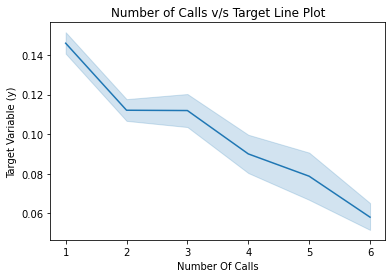

In [120]:
sns.lineplot(x=df['num_calls'], y=df['y'])
plt.title('Number of Calls v/s Target Line Plot')
plt.xlabel('Number Of Calls')
plt.ylabel('Target Variable (y)')

#### Insights

Analyzing the 'num_calls' vs. 'y' lineplot, it is observed that individuals most likely to opt for insurance received calls 1 to 3 times. Conversely, the least likely to opt for insurance received calls 4 to 6 times.

The 'num_calls' column demonstrates a clear linearly decreasing relationship with the target variable 'y'. The frequency of calls appears to have a negative correlation with the likelihood of opting for insurance.

## Encoding Categorical Columns

In [121]:
# Since all the categorical feature follow linearly increasing relationship with target (Refer Feature v/s Target Plot),
# Label encoding is done since the feature is behaving ordinal with respect to target variable.

df['job'] = df['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4, 'self-employed':5, 'admin.':6, 'management':7, 'unemployed':8, 'retired':9, 'student':10})
df['marital'] = df['marital'].map({'married':0,'divorced':1,'single':2})
df['education_qual'] = df['education_qual'].map({'primary':0,'secondary':1,'tertiary':2})
df['call_type'] = df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon'] = df['mon'].map({'may':0, 'jul':1,  'jan':2, 'nov':3, 'jun':4, 'aug':5, 'feb':6, 'apr':7, 'oct':8, 'sep':9, 'dec':10, 'mar':11})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})


In [122]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0


## Train Test Split 

In [123]:
x = df.drop('y', axis=1)
y = df['y']

from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=0.25,random_state=1)

x_tr.shape, x_te.shape, y_tr.shape, y_te.shape

((33895, 10), (11299, 10), (33895,), (11299,))

## Balancing the Data

In [127]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_smt_tr,y_smt_tr = smt.fit_resample(x_tr,y_tr)

## Train Machine Learning Models

### Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_smt_tr,y_smt_tr)
y_pred_log = log_model.predict(x_te)

In [129]:
from sklearn.model_selection import cross_val_score
cross_val_log = cross_val_score(log_model, x_tr, y_tr, cv=10).mean()
cross_val_log

0.8924028372201928

In [130]:
from sklearn.metrics import roc_auc_score
auroc_log = round(roc_auc_score(y_te, log_model.predict_proba(x_te)[:,1]),2)
auroc_log

0.88

In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_te,y_pred_log)

array([[7384, 2646],
       [ 158, 1111]], dtype=int64)

##### Understanding
0.88 is the AUROC score for Logistic Regression model. This is a good fit model with a descent AUROC score

### KNN ALGORITHM

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = np.arange(1,21)
cross_val_knn_list = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_smt_tr,y_smt_tr)
    print('K value: ', k, 'cross_val_score: ', cross_val_score(knn_model, x_tr,y_tr,cv=10).mean())
    cross_val_knn_list.append(cross_val_score(knn_model, x_tr,y_tr,cv=10).mean())


K value:  1 cross_val_score:  0.8597134926375546
K value:  2 cross_val_score:  0.8812803439202487
K value:  3 cross_val_score:  0.8793626264393479
K value:  4 cross_val_score:  0.8848207501103257
K value:  5 cross_val_score:  0.8835521655607984
K value:  6 cross_val_score:  0.884260208500345
K value:  7 cross_val_score:  0.8837292872742022
K value:  8 cross_val_score:  0.8845257300427984
K value:  9 cross_val_score:  0.8834047164564168
K value:  10 cross_val_score:  0.8844077098299113
K value:  11 cross_val_score:  0.8838472291493126
K value:  12 cross_val_score:  0.885410929512539
K value:  13 cross_val_score:  0.8850273181236187
K value:  14 cross_val_score:  0.8853517670826403
K value:  15 cross_val_score:  0.8852633411409983
K value:  16 cross_val_score:  0.8857647899546599
K value:  17 cross_val_score:  0.8856172973292911
K value:  18 cross_val_score:  0.8859417462883126
K value:  19 cross_val_score:  0.885882705717178
K value:  20 cross_val_score:  0.8861778215308769


In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = np.arange(21,41)
cross_val_knn = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_smt_tr,y_smt_tr)
    print('K value: ', k, 'cross_val_score: ', cross_val_score(knn_model, x_tr,y_tr,cv=10).mean())
    cross_val_knn.append(cross_val_score(knn_model, x_tr,y_tr,cv=10).mean())

K value:  21 cross_val_score:  0.8858532942340785
K value:  22 cross_val_score:  0.8857942275503516
K value:  23 cross_val_score:  0.8855876334244662
K value:  24 cross_val_score:  0.8859417201757204
K value:  25 cross_val_score:  0.8859711490672147
K value:  26 cross_val_score:  0.8862662474725187
K value:  27 cross_val_score:  0.8860597316844101
K value:  28 cross_val_score:  0.8862367750600372
K value:  29 cross_val_score:  0.8857940621706005
K value:  30 cross_val_score:  0.8860596098256464
K value:  31 cross_val_score:  0.8861776996721128
K value:  32 cross_val_score:  0.8861776735595207
K value:  33 cross_val_score:  0.8868856729780802
K value:  34 cross_val_score:  0.8866201949566139
K value:  35 cross_val_score:  0.8865317167897876
K value:  36 cross_val_score:  0.8856171319495401
K value:  37 cross_val_score:  0.8861187113261628
K value:  38 cross_val_score:  0.8860597403886075
K value:  39 cross_val_score:  0.8861778128266794
K value:  40 cross_val_score:  0.885853242008894


In [126]:
cross_val_knn_max = max(cross_val_knn)
cross_val_knn_max

0.8868856729780802

In [127]:
print('The best value of k is 33 and cross val score is ', cross_val_knn_max)

The best value of k is 33 and cross val score is  0.8868856729780802


In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_model = KNeighborsClassifier(n_neighbors=33)
knn_model.fit(x_smt_tr,y_smt_tr)

KNeighborsClassifier(n_neighbors=33)

In [170]:
cross_val_score_knn_best = cross_val_score(knn_model, x_tr,y_tr,cv=10).mean()
cross_val_score_knn_best

0.885853242008894

In [171]:
auroc_knn = round(roc_auc_score(y_te, knn_model.predict_proba(x_te)[:,1]),2)
auroc_knn

0.84

##### Understanding
0.84 is the AUROC value of KNN model which is less than logistic regression model.

### Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

cross_val_dt_list = []

for d in [1,5,6,7,8,9,10,12,15]:
    dt_model = DecisionTreeClassifier(max_depth = d, random_state = 0)
    dt_model.fit(x_smt_tr,y_smt_tr)
    print('Depth: ', d, 'cross_val_score: ', cross_val_score(dt_model, x_tr, y_tr, cv=10).mean())
    cross_val_dt_list.append(cross_val_score(dt_model, x_tr, y_tr, cv=10).mean())

Depth:  1 cross_val_score:  0.8814574482252577
Depth:  5 cross_val_score:  0.9008406687957133
Depth:  6 cross_val_score:  0.9003686401693489
Depth:  7 cross_val_score:  0.899188411927884
Depth:  8 cross_val_score:  0.8997783911335564
Depth:  9 cross_val_score:  0.8992769423198951
Depth:  10 cross_val_score:  0.8960903704593466
Depth:  12 cross_val_score:  0.8927270685742785
Depth:  15 cross_val_score:  0.8881541791898308


In [143]:
cross_val_dt_max = max(cross_val_dt_list)
print('The best depth is 5 and cross val score is ', cross_val_dt_max)

The best depth is 5 and cross val score is  0.9008406687957133


In [140]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dt_model.fit(x_smt_tr,y_smt_tr)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [141]:
cross_val_dt_best = cross_val_score(dt_model, x_tr, y_tr, cv=10).mean()
cross_val_dt_best

0.9008406687957133

In [144]:
auroc_dt = round(roc_auc_score(y_te, dt_model.predict_proba(x_te)[:,1]),2)
auroc_dt

0.87

##### Understanding
0.87 is the AUROC value of Decision Tree Model which is still less than logistic regression model.

### Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cross_val_rf = []

for d in [1,5,10,15,20,22,24,26,28,30,32,34,36]:
    rf_model = RandomForestClassifier(max_depth = d, random_state = 1)
    rf_model.fit(x_smt_tr,y_smt_tr)
    print('Depth: ', d, 'cross_val_score: ', cross_val_score(rf_model, x_tr, y_tr, cv=10).mean())
    cross_val_rf.append(cross_val_score(rf_model, x_tr, y_tr, cv=10).mean())

Depth:  1 cross_val_score:  0.8814574482252577
Depth:  5 cross_val_score:  0.8960614028903157
Depth:  10 cross_val_score:  0.9041449910390286
Depth:  15 cross_val_score:  0.9039384578425255
Depth:  20 cross_val_score:  0.9034663943993714
Depth:  22 cross_val_score:  0.9024633923216794
Depth:  24 cross_val_score:  0.9029647105723795
Depth:  26 cross_val_score:  0.9020796503697979
Depth:  28 cross_val_score:  0.9025221891752861
Depth:  30 cross_val_score:  0.9021387518703146
Depth:  32 cross_val_score:  0.9034959103328397
Depth:  34 cross_val_score:  0.9034958842202476
Depth:  36 cross_val_score:  0.9034073886450263


In [149]:
cross_val_rf_max = max(cross_val_rf)
print("The best value of max_depth is 10 and cross val score is ", cross_val_rf_max)

The best value of max_depth is 10 and cross val score is  0.9041449910390286


In [150]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth = 10, random_state = 0)
rf_model.fit(x_smt_tr,y_smt_tr)

RandomForestClassifier(max_depth=10, random_state=0)

In [155]:
cross_val_rf_best = cross_val_score(rf_model, x_tr, y_tr, cv=10).mean()
cross_val_rf_best

0.9035844755416405

In [153]:
auroc_rf = roc_auc_score(y_te, rf_model.predict_proba(x_te)[:,1])
auroc_rf = round(auroc_rf, 2)
auroc_rf

0.9

##### Understanding
0.9 is the auroc score of random forest model. Out of all the model trained so far, random forest gives the best result with good auroc value.

### Gradient Boosting

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

cross_val_gb = []
for lr in [0.01,0.05,0.08,0.1,0.15,0.2,0.3,0.5,0.7,0.9,1]:
    gb_model = GradientBoostingClassifier(learning_rate = lr)
    gb_model.fit(x_smt_tr, y_smt_tr)
    print('Learning rate: ', lr, 'cross_val_score: ', cross_val_score(gb_model,x_tr,y_tr,cv=10).mean())
    cross_val_gb.append(cross_val_score(gb_model,x_tr,y_tr,cv=10).mean())

Learning rate:  0.01 cross_val_score:  0.8856469090089314
Learning rate:  0.05 cross_val_score:  0.9032895425160875
Learning rate:  0.08 cross_val_score:  0.9043810575773955
Learning rate:  0.1 cross_val_score:  0.9047940456326253
Learning rate:  0.15 cross_val_score:  0.9069771976140053
Learning rate:  0.2 cross_val_score:  0.9067412268218102
Learning rate:  0.3 cross_val_score:  0.9066821775464782
Learning rate:  0.5 cross_val_score:  0.9051775699795712
Learning rate:  0.7 cross_val_score:  0.9044989124105319
Learning rate:  0.9 cross_val_score:  0.9026991368047413
Learning rate:  1 cross_val_score:  0.9016666274977784


In [157]:
cross_val_gb_max = max(cross_val_gb)
print('The best learning rate is 0.15 and cross val score is ', cross_val_gb_max)

The best learning rate is 0.15 and cross val score is  0.9069771976140053


In [158]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(learning_rate = 0.15)
gb_model.fit(x_smt_tr, y_smt_tr)

GradientBoostingClassifier(learning_rate=0.15)

In [159]:
cross_val_gb_best = cross_val_score(gb_model,x_tr,y_tr,cv=10).mean()
cross_val_gb_best

0.9069771976140053

In [160]:
auroc_gb = roc_auc_score(y_te, gb_model.predict_proba(x_te)[:,1])
auroc_gb = round(auroc_gb,2)
auroc_gb

0.9

##### Understanding
0.9 is the auroc score of gradient boosting model. Out of all the models trained so far, random forest and gradient boosting gives the best result with good auroc value of 0.9

### XGBoost

In [164]:
import xgboost as xgb

cross_val_xgb = []
for lr in [0.01,0.05,0.08,0.1,0.15,0.2,0.3,0.5,0.7,0.9,1]:
    xgb_model = xgb.XGBClassifier(colsample_bytree = 0.4, learning_rate = lr, n_estimators = 100)
    xgb_model.fit(x_smt_tr,y_smt_tr)
    print('Learning rate: ', lr, 'cross val score: ', cross_val_score(xgb_model, x_tr, y_tr, cv=10).mean())
    cross_val_xgb.append(cross_val_score(xgb_model, x_tr, y_tr, cv=10).mean())

Learning rate:  0.01 cross val score:  0.8821360796817048
Learning rate:  0.05 cross val score:  0.9038499796756989
Learning rate:  0.08 cross val score:  0.904469640194591
Learning rate:  0.1 cross val score:  0.9060921635240161
Learning rate:  0.15 cross val score:  0.9061217490910641
Learning rate:  0.2 cross val score:  0.90618065039504
Learning rate:  0.3 cross val score:  0.9046464398526902
Learning rate:  0.5 cross val score:  0.9029651370780531
Learning rate:  0.7 cross val score:  0.8992770380660666
Learning rate:  0.9 cross val score:  0.8962972170069572
Learning rate:  1 cross val score:  0.8957071681677056


In [165]:
cross_val_xgb_max = max(cross_val_xgb)
print('the best learning rate is 0.2 and cross val score is ', cross_val_xgb_max)

the best learning rate is 0.2 and cross val score is  0.90618065039504


In [166]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(colsample_bytree = 0.4, learning_rate = 0.2, n_estimators = 100)
xgb_model.fit(x_smt_tr,y_smt_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [167]:
cross_val_xgb_best = cross_val_score(xgb_model, x_tr, y_tr, cv=10).mean()
cross_val_xgb_best

0.90618065039504

In [168]:
auroc_xgb = roc_auc_score(y_te, xgb_model.predict_proba(x_te)[:,1])
auroc_xgb = round(auroc_xgb, 2)
auroc_xgb

0.91

### Interpretations

Six machine learning models, including Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boosting, and XGBoost, were trained on the data.

Among these models, **XGBoost** achieved the highest cross-validation score of **0.91**, indicating that it is the most suitable model for the given data.

## Cross Validation Score for ML Models

In [173]:
print('Cross Validation Score for Logistic Regression Model: ', cross_val_log)
print('Cross Validation Score for K-Nearest Neighbors Classification Model: ', cross_val_score_knn_best)
print('Cross Validation Score for Decision Tree Classification Model: ', cross_val_dt_best)
print('Cross Validation Score for Random Forest Classification Model: ', cross_val_rf_best)
print('Cross Validation Score for Gradient Boosting Classification Model: ', cross_val_gb_best)
print('Cross Validation Score for Extreme-Gradient Boosting Classification Model: ', cross_val_xgb_best)

Cross Validation Score for Logistic Regression Model:  0.8924028372201928
Cross Validation Score for K-Nearest Neighbors Classification Model:  0.885853242008894
Cross Validation Score for Decision Tree Classification Model:  0.9008406687957133
Cross Validation Score for Random Forest Classification Model:  0.9035844755416405
Cross Validation Score for Gradient Boosting Classification Model:  0.9069771976140053
Cross Validation Score for Extreme-Gradient Boosting Classification Model:  0.90618065039504


## AUROC Score for ML Models

In [174]:
print('AUROC Score for Logistic Regression Model: ', auroc_log)
print('AUROC Score for K-Nearest Neighbors Classification Model: ', auroc_knn)
print('AUROC Score for Decision Tree Classification Model: ', auroc_dt)
print('AUROC Score for Random Forest Classification Model: ', auroc_rf)
print('AUROC Score for Gradient Boosting Classification Model: ', auroc_gb)
print('AUROC Score for Extreme-Gradient Boosting Classification Model: ', auroc_xgb)

AUROC Score for Logistic Regression Model:  0.88
AUROC Score for K-Nearest Neighbors Classification Model:  0.84
AUROC Score for Decision Tree Classification Model:  0.87
AUROC Score for Random Forest Classification Model:  0.9
AUROC Score for Gradient Boosting Classification Model:  0.9
AUROC Score for Extreme-Gradient Boosting Classification Model:  0.91


## Feature Importance: XGBoost Model

In [186]:
ft_imp_xgb = xgb_model.get_booster().get_score(importance_type='weight')
ft_imp_xgb = list(ft_imp_xgb.items())

# Create a DataFrame from the list
imp = pd.DataFrame(ft_imp_xgb, columns=['Feature', 'Importance'])

# Sort the DataFrame by Importance in descending order
imp.sort_values('Importance', ascending=False, inplace=True)
imp

,Feature,Importance
0,age,894.0
5,day,832.0
7,dur,770.0
6,mon,595.0
8,num_calls,377.0
1,job,347.0
2,marital,322.0
3,education_qual,310.0
9,prev_outcome,292.0
4,call_type,186.0


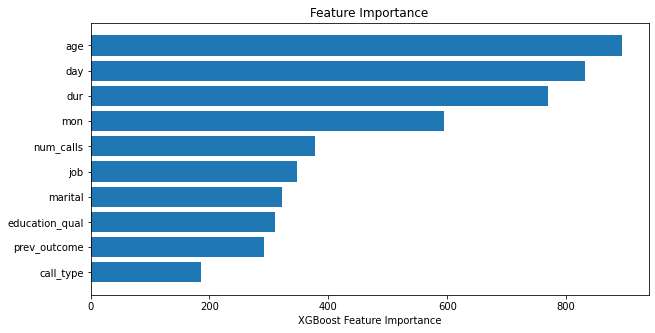

In [189]:
importance_dict = xgb_model.get_booster().get_score(importance_type='weight')

# Extracting feature names and importance values
features = list(importance_dict.keys())
importance_values = list(importance_dict.values())

# Sorting features based on importance values
sorted_idx = np.argsort(importance_values)

plt.figure(figsize=(10, 5))
plt.barh(np.array(features)[sorted_idx], np.array(importance_values)[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importance")

## Top 5 Important Features

1. Age

2. Day

3. Duration of the call

4. Month

5. Number of calls